We must start with a clean dataset because, if we want to obtain a good model, we first need clean data.
I examined the dataset and recognized some values that could affect the model’s behavior and expected performance.
I started working on the dataset by first removing outliers, then performing imputation, and finally doing post-cleaning check

Removed of Illogical / Invalid Data
In the dataset, records that were pyhsically impossible were  identified

Age Errors

five records were found  with ages of 123 and 144

Work Experience Errors
two records were found where work experience exceeded the person's age or showed impossible values such as 123 years

Reason:
These records are not considered natural outliers but rather than data entry errors.Instead of replacing these values with the median, removing them is safer because artificially normalizing an incorrect profile could negatively affect the model's decision-making process.

Result:
A total of 7 invalid rows were removed form the dataset

In [2]:
import pandas as pd
#Load the dataset
df = pd.read_csv('C:/Users/user/Desktop/mlops-dataops-devops-portfolio/01-future-mlops-credit-risk-prediction-project/data/credit_risk_dataset.csv')

#Define a filter for invalid values 
#person_age > 100 or person_emp_lenght > 60 
#Tilde (~)operator is used to 'negate' the condition 

invalid_filter = (df['person_age'] > 100) | (df['person_emp_length'] > 60)
df = df[~invalid_filter].copy()

Missing Data Imputation
There are two significant missing values in two columns:
Work Expreince(person_emp_length - 895 missing values)
missing values were filled using the median because it is robust to outliers and provides a more stable representation than the mean

Interest Rate(loan_int_rate 3116 missing values)
Missing values were imputed using the average interest rate within each loan grade group 

Reason(Bussiness Context) 
Using a global average would ignore risk segmentation.Since interest rate by credit risk level, grouping by loan grade preserves the bank's risk-based pricing strategy.

In [3]:
emp_median = df['person_emp_length'].median()
#fillna: fills NaN values
df['person_emp_length'] = df['person_emp_length'].fillna(emp_median)

df.groupby('loan_grade') Groups the data by specific column
In banking a loan grade(A, B, C) represents the creditworthiness of a borrower Grouping by this column allows us to treat "High Risk" and "Low Risk" customers separately
It tells pandas "Look at all the 'A' grades together, all the 'B'grades together as so on"

['loan_int_rate'] this is column selection applied to the grouped object
After grouping the whole table, we specify that we only want to perform calculations on the Interest Rate (loan_int_rate) column.
We don't want to calculate the average age or income; we only care about the average interest rate for each grade.

.transform('mean') this is the most powerful part of the code .ıt performs a calcualtion and broadcassts the resultback to the original shape of the DataFrame

Crucial Difference (mean vs. transform)

If you used .mean(), you would get a short list (e.g., A: 7%, B: 10%).

By using .transform('mean'), Pandas calculates the average for the group but returns a series where every row has the average value of its respective group.

If a person is in Grade 'A' this function generates the value'  7.34'(the average for grade A ) for that specific row, regardless of whether the original value was missing or not

df['loan_int_rate'].fillna(...) this method fillsNaN(Not a number /Missing) entires with the values provided inside the parentheses.
It acts as a filter.It says only replace value if it is currently empty.If a row already has a recorded interest rate, do not toucch it(keep the original value).


In [4]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df.groupby('loan_grade')['loan_int_rate'].transform('mean')
)

Data Validation(Post-Cleaning Check)
After the cleaning process

it was confirmed that no missing values (Nan) remained in the dataset.
the dataset size was reduced from 32,581 to 32,574, ensuring overall data intergrity was manitained.

check if there any missing values left
isnull() .sum() : counts null entries per column


In [5]:
print("Missing values after cleaning")
print(df.isnull().sum())

#Final row count
print(f"\nFinal row count : {len(df)}")

#Save the cleaned data
df.to_csv('credit_risk_cleaned.csv', index=False)

Missing values after cleaning
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Final row count : 32574


In [5]:
#query() this method allows writing SQL-like queries
high_risk_renters = df.query("person_income > 50000 and person_home_ownership == 'RENT'")
print(high_risk_renters)

       person_age  person_income person_home_ownership  person_emp_length  \
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
6              26          77100                  RENT                8.0   
7              24          78956                  RENT                5.0   
8              24          83000                  RENT                8.0   
...           ...            ...                   ...                ...   
32567          53          85000                  RENT                2.0   
32570          58          72000                  RENT                5.0   
32574          52          65004                  RENT                4.0   
32575          52          64500                  RENT                0.0   
32578          65          76000                  RENT                3.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [6]:
#isin() Select rows where loan_grade is either 'A2 or 'B' 
#Efficient way to check against a list of values 

secure_grades = df[df['loan_grade'].isin(['A', 'B'])]
print(secure_grades)

       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
5              21           9900                   OWN                2.0   
6              26          77100                  RENT                8.0   
7              24          78956                  RENT                5.0   
8              24          83000                  RENT                8.0   
...           ...            ...                   ...                ...   
32575          52          64500                  RENT                0.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [7]:
#between() Select rows where person_age is between 20 and 25 (inclusive)
#Handy for range filtering.

young_applicants = df[df['person_age'].between(20, 25)]
print(young_applicants)

       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
17826          25          40000              MORTGAGE                6.0   
17828          24          48200                  RENT                3.0   
17829          23         117696              MORTGAGE                2.0   
17831          24          38000                  RENT                0.0   
17832          22          52000              MORTGAGE                6.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   

In [11]:
#nlargest()get the top 5 rows with the highest person_income
#faster than sorting the entire dataframe
top_earners = df.nlargest(5, 'person_income')
print(top_earners)

       person_age  person_income person_home_ownership  person_emp_length  \
30049          42        2039784                  RENT                0.0   
32546          60        1900000              MORTGAGE                5.0   
32497          63        1782000                  RENT               13.0   
31924          44        1440000              MORTGAGE                7.0   
31922          47        1362000              MORTGAGE                9.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
30049            VENTURE          C       8450      12.290000            0   
32546           PERSONAL          A       1500       7.327732            0   
32497          EDUCATION          C      12025      14.270000            0   
31924  DEBTCONSOLIDATION          A       6400       7.400000            0   
31922            VENTURE          A       6600       7.740000            0   

       loan_percent_income cb_person_default_on_file  \
30049       

In [6]:
#value_counts Count occurrences of each loan_intent and normalize to show percentages.
#Crucial for checking class imbalance.
intent_distribution = df['loan_intent'].value_counts(normalize=True)
print(intent_distribution)

loan_intent
EDUCATION            0.198041
MEDICAL              0.186376
VENTURE              0.175477
PERSONAL             0.169430
DEBTCONSOLIDATION    0.160005
HOMEIMPROVEMENT      0.110671
Name: proportion, dtype: float64


In [14]:
#corr() Calculate the correlation matrix for income, loan amount, and age
#Helps identify relationships between variables.
correlation_matrix = df[['person_income', 'loan_amnt', 'person_age']].corr()
print(correlation_matrix)

               person_income  loan_amnt  person_age
person_income       1.000000   0.317497    0.140497
loan_amnt           0.317497   1.000000    0.051751
person_age          0.140497   0.051751    1.000000


In [16]:
#nuniqueue() count the number of unique/distinct values in loan_grade
num_unique_grades = df['loan_grade'].nunique()
print(num_unique_grades)

7


In [10]:
#map() Transform 'Y' to 1 and 'N' to 0 in the default_on_file column
#simple way for 1-to-1 mapping
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})
print(df['cb_person_default_on_file'])

1        0
2        0
3        0
4        1
5        0
        ..
32576    0
32577    0
32578    0
32579    0
32580    0
Name: cb_person_default_on_file, Length: 32574, dtype: int64


In [11]:
print(df.info())

<class 'pandas.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  str    
 3   person_emp_length           32574 non-null  int64  
 4   loan_intent                 32574 non-null  str    
 5   loan_grade                  32574 non-null  str    
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  int64  
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(2), int64(7), str(3)
memory usage: 3.2 MB
None


In [7]:
#astype() Fill missing values with 0 and convert person_emp_length to integer.
#Ensures data type consistency
df['person_emp_length'] = df['person_emp_length'].fillna(0).astype(int)
print(df['person_emp_length'])

1        5
2        1
3        4
4        8
5        2
        ..
32576    1
32577    4
32578    3
32579    5
32580    2
Name: person_emp_length, Length: 32574, dtype: int64


In [22]:
#apply() define a custom function to calculate risk category
def calculate_risk(row):
    if row['loan_amnt'] > row['person_income'] * 0.5:
        return 'High Risk'
    else:
        return 'Normal'

#Apply the function acroos each row (axis=1)
df['risk_category'] = df.apply(calculate_risk, axis=1)

print(df)


       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                  5   
2              25           9600              MORTGAGE                  1   
3              23          65500                  RENT                  4   
4              24          54400                  RENT                  8   
5              21           9900                   OWN                  2   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                  1   
32577          54         120000              MORTGAGE                  4   
32578          65          76000                  RENT                  3   
32579          56         150000              MORTGAGE                  5   
32580          66          42000                  RENT                  2   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

0    1
1    0
2    0
3    0
4    1
Name: cb_person_default_on_file, dtype: int64


fundamental dataframe funtion will be added

In [8]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv('credit_risk_cleaned.csv')

#Sorting Sort by loan_amnt(descending) then by person_income(asecending)
#inplace=False returns a new dataframe
sorted_df = df.sort_values(by=['loan_amnt', 'person_income'], ascending=[False, True])

print(sorted_df)

#sort the dataframe by its index(useful after random sampling)
sorted_index_df = df.sample(10).sort_index()
print(sorted_index_df)



       person_age  person_income person_home_ownership  person_emp_length  \
3              24          54400                  RENT                8.0   
22974          28          60000              MORTGAGE                3.0   
11867          22          60350              MORTGAGE                6.0   
12999          24          63750              MORTGAGE                8.0   
2              23          65500                  RENT                4.0   
...           ...            ...                   ...                ...   
15945          26           7904              MORTGAGE                0.0   
18496          33          18000                  RENT                0.0   
865            26          19500                  RENT                0.0   
1349           22          26000              MORTGAGE                3.0   
8601           26          59000              MORTGAGE                7.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [ ]:
#COMBINING DATA
#concat stack twwo dataframeson top of each other(vertical stacking)
#axis=0 Vertical exis=1 horizontal
df_part1 = df.iloc[:5]  #first 5 rows
df_part2 = df.iloc[5:10]  #next 5 rows

#merge(join)
#join with another dataframe based on common key(like sql join)
#Creating a dummy dataframe for merging

grade_desc = pd.DataFrame({

    'loan_grade': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Description':['Excellent', 'Good', 'Fair', 'Poor', 'Risky', 'Very Risky', 'Default Likely']
})
#left join to add description to the main dataframe
#on='loan_grade': the common column
merged_df = pd.merge(df, grade_desc, on='loan_grade', how='left')

print(merged_df)

#Grouping and aggregation
#Group by 'loan_intent' and calculate multiple statistics
agg_result = df.groupby('loan_intent').agg({
    'loan _amnt':['mean', 'max'], #Avg and Max loan
    'person_income': 'median', #median income
    'person_age': 'min' #min age
})

print(agg_result)


#RESHAPING
#create a spreadsheet-style pivot table
pivot_table_df = df.pivot_table(
    values='loan_amnt', 
    index='loan_grade', 
    columns='person_home_ownership', 
    aggfunc='mean' # Calculate average 
)

#STRING OPERATIONS
#content loan_intent to lowercase

df['loan_intent_lower'] = df['loan_intent'].str.lower()
#check if loan_intent containsthe word 'MEDICAL'
medical_loans = df[df['loan_intent'].strt.contains('MEDICAL')]

#HNADLING DUBLICATES
#removed duplicate rows based o specific columns
#kepp='first' keep the first occurrence

unique_persons = df.drop_duplicates(subset=['person_income', 'person_age'], kepp='first')


In [ ]:
#RESHAPING
#create a spreadsheet-style pivot table
pivot_table_df = df.pivot_table(
    values='loan_amnt', 
    index='loan_grade', 
    columns='person_home_ownership', 
    aggfunc='mean' # Calculate average 
)
print(pivot_table_df)
print(pivot_table_df.round(2)) # Okunması kolay olsun diye virgülden sonra 2 hane

person_home_ownership      MORTGAGE         OTHER           OWN          RENT
loan_grade                                                                   
A                       9052.162360   7114.423077   7935.664147   8032.218915
B                      11372.680158  11895.588235   9979.508706   8979.187657
C                      10510.902839  11117.647059   8318.434343   8535.264228
D                      12804.438481  12397.500000  10003.102837   9815.033144
E                      15448.303835  13575.000000  12504.385965  11415.267857
F                      17002.835052  25000.000000  13078.333333  13003.346457
G                      18332.258065           NaN  22800.000000  14936.607143


In [ ]:
#Adding a Column
df['new_column'] = 0
#Insert at position
df.insert(1, 'is_senior', df['person_age'] > 50) #if value bigger than 50 must be 1 if not most be 0
#Renaming columns
df = df.rename(columns={'person_home_ownership': 'home_status', 'loan_intent': 'loan_target'})
#DDropping columns axis=1 it means that columns if inplace = true df is changed permanantly
df.drop('new_column', axis=1, inplace=True)


In [ ]:
#Column Range subset_columns = df.loc[: = it means that all of rows]
subset_columns = df.loc[:, 'person_income':'loan_grade']
#Row range
subset_rows = df.iloc[10:21]
#Conditional Selection
renters_income = df.loc[df['person_home_ownership'] == 'RENT', ['person_income']]

In [ ]:
#Adding a Row. you must to do rows as dataframe
new_row = pd.DataFrame({
    'person_age': [30],
    'person_income': [50000],
    'person_home_ownership': ['RENT'],
    # ... diğer sütunlar ...
})

#ignore_index=True 
df = pd.concat([df, new_row], ignore_index=True)

#Dropping Rows
df = df.drop([0, 1], axis=0)

#Reset Index
df = df.reset_index(drop=True)
#Set Index
df = df.set_index('customer_id')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print(df.info())

<class 'pandas.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  str    
 3   person_emp_length           32574 non-null  int64  
 4   loan_intent                 32574 non-null  str    
 5   loan_grade                  32574 non-null  str    
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  str    
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(2), int64(6), str(4)
memory usage: 3.2 MB
None


In [13]:
#load the cleaned dataset
df = pd.read_csv('C:/Users/user/Desktop/mlops-dataops-devops-portfolio/01-future-mlops-credit-risk-prediction-project/data/credit_risk_cleaned.csv')

df.isna()

df.isnull()   isna = isnull 

df.notna()

df.notnull()

df.isna().sum() sum is operated based on column give us series that is calculated by sum function that give us number ıd NaN

df.isnull().sum()

df.isna().sum().sum() is calculated series 

df.info()

df.eq("")

df.replace("", np.nan)

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  str    
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  str    
 5   loan_grade                  32574 non-null  str    
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  str    
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), str(4)
memory usage: 3.0 MB


In [11]:
df.eq("").sum()
#df.replace("", np.nan)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
#Set visualization style
#whitegrid make charts easier to read by adding subtle background lines
sns.set_theme(style='whitegrid')
#create a large figure to hold 4 subplots
plt.figure(figsize=(22, 26))

<Figure size 2200x2600 with 0 Axes>

<Figure size 2200x2600 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_11160\2207597805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


Text(0, 0.5, 'Count')

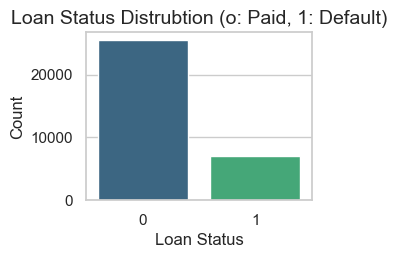

In [7]:
#Target Variable Distrubtion
plt.subplot(2, 2, 1) #2 rows 2 columns, position 1 
#Countplot shows thee number of observations in each categorical bin
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Loan Status Distrubtion (o: Paid, 1: Default)', fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Count')


C:\Users\user\AppData\Local\Temp\ipykernel_11160\2410760355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='coolwarm')


Text(0, 0.5, 'Interest Rate')

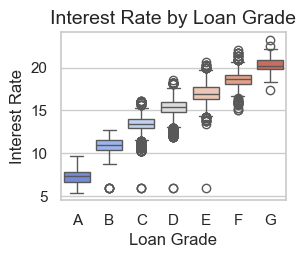

In [8]:
#Interest Rate by Loan Grade
plt.subplot(2,2,2)
#boxplot shows the distribution of quantitative data
#order Ensures grades are displayed from A to G
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='coolwarm')
plt.title('Interest Rate by Loan Grade', fontsize=14)
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')



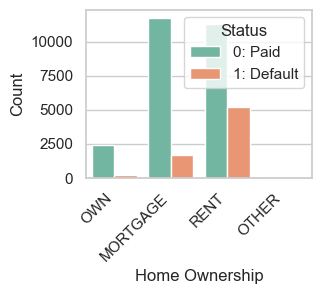

In [9]:
#Risk by home ownership
plt.subplot(2, 2, 3)
#hue='loan_status': Splits the bars by whether they defaulted or not
sns.countplot(x='person_home_ownership', hue='loan_status', data=df, palette='Set2')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', labels=['0: Paid', '1: Default'])

Text(0, 0.5, 'Loan Amount')

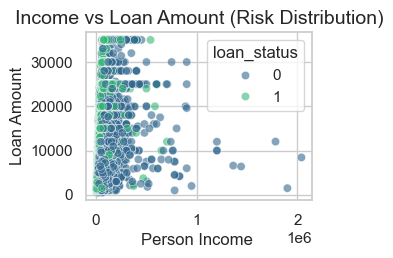

In [32]:
#Income vs Loan Amount
plt.subplot(2, 2, 4)
#Scatterplot: Shows relationship between two numeric variables
#alpha=0.6: Makes points slightly transparent to see overlaps
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df, alpha=0.6, palette='viridis')
plt.title('Income vs Loan Amount (Risk Distribution)', fontsize=14)
plt.xlabel('Person Income ')
plt.ylabel('Loan Amount')
#Limit X-axis to 150,000 to ignore extreme high-income outliers and focus on the main group
#plt.xlim(0, 150000)

(0.0, 150000.0)

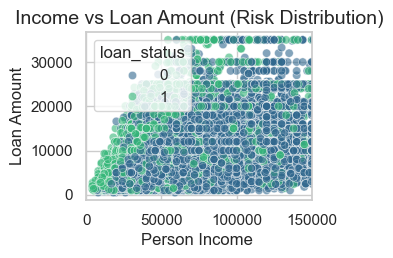

In [33]:
#Income vs Loan Amount
plt.subplot(2, 2, 4)
#Scatterplot: Shows relationship between two numeric variables
#alpha=0.6: Makes points slightly transparent to see overlaps
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df, alpha=0.6, palette='viridis')
plt.title('Income vs Loan Amount (Risk Distribution)', fontsize=14)
plt.xlabel('Person Income ')
plt.ylabel('Loan Amount')
#Limit X-axis to 150,000 to ignore extreme high-income outliers and focus on the main group
plt.xlim(0, 150000)

In [17]:
#DISLPLAY AND SAVE
#tight_layout() prevents overlapping texts/titles
plt.tight_layout()

#Save the plot as a PNG file in your folder
plt.savefig('eda_my_analysis.png', dpi=300)

#display the plot on the screen 
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_15668\779731421.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


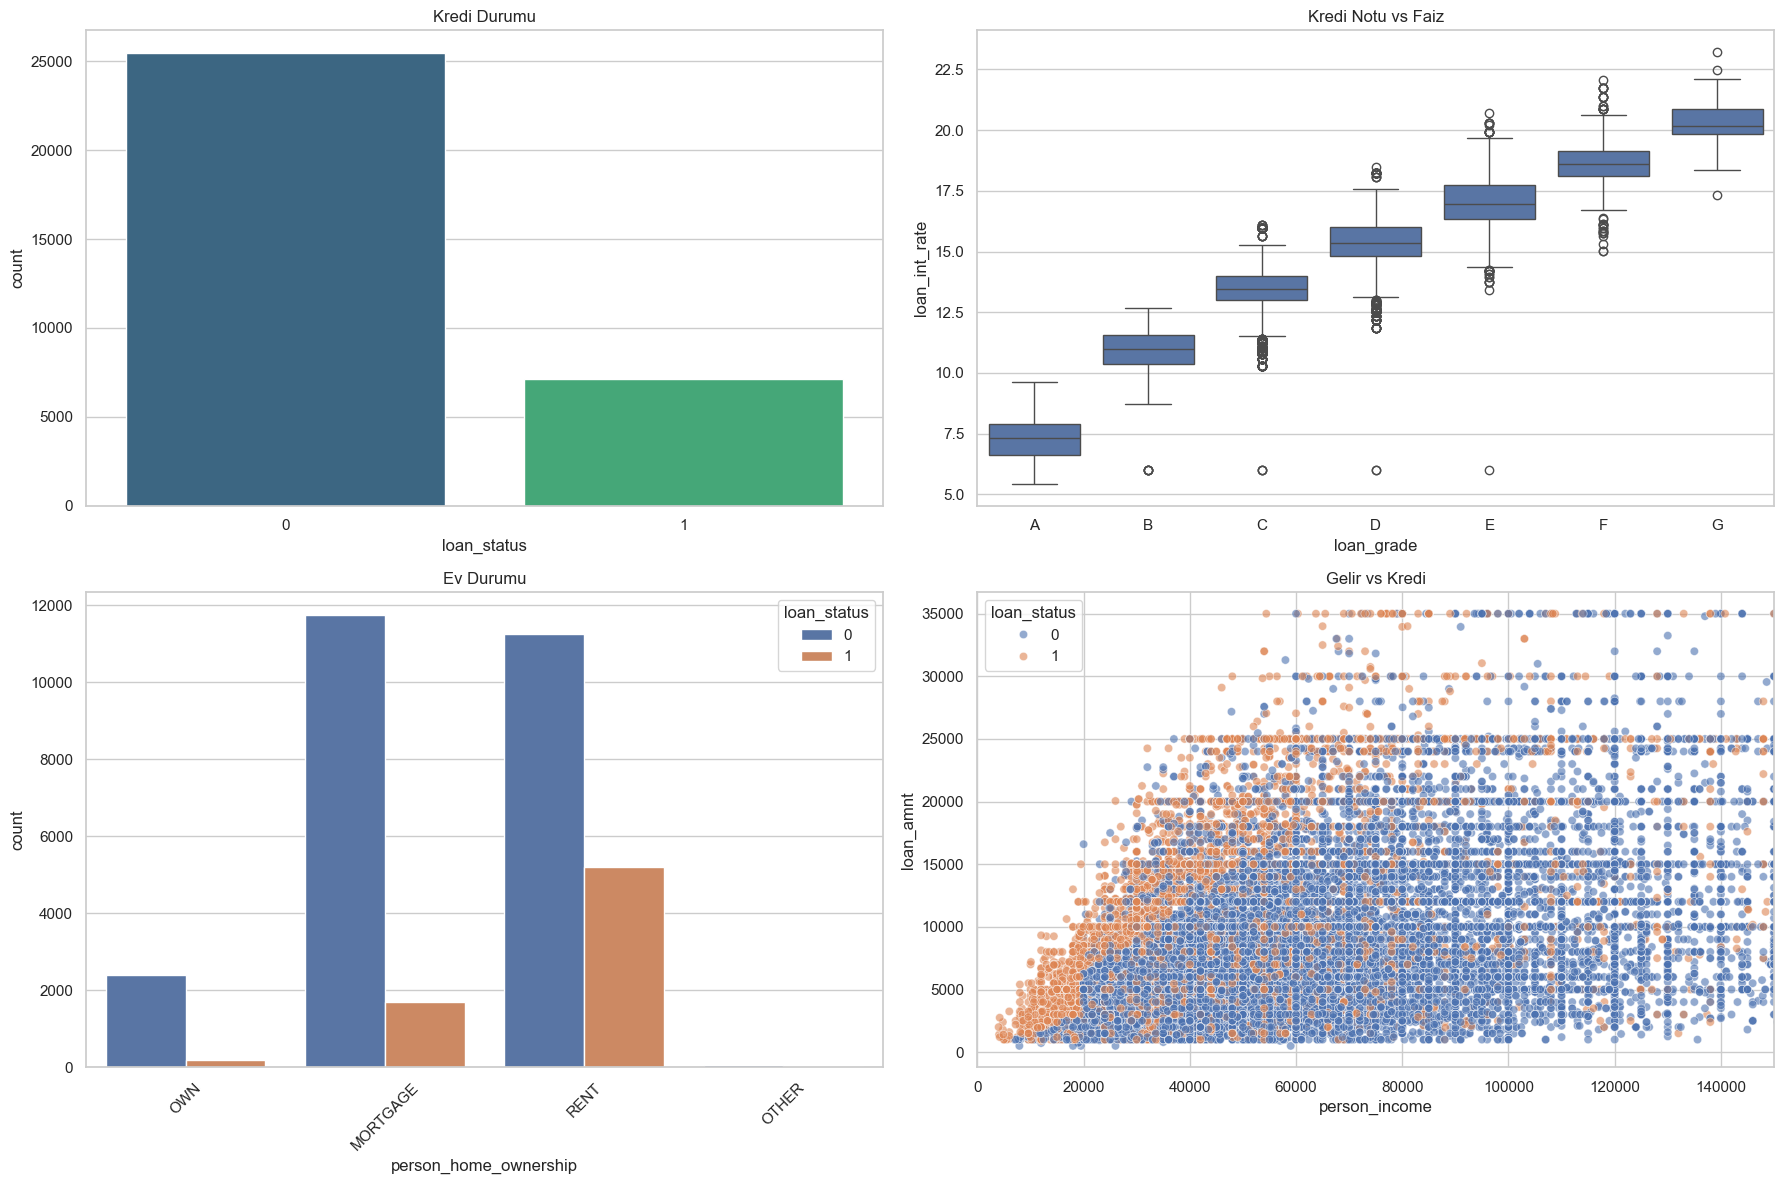

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_risk_cleaned.csv')
sns.set_theme(style="whitegrid")

# 1. TUVALİ AÇ (Tüm çizimler bu tuvalin içinde olmalı)
plt.figure(figsize=(18, 12))

# 2. ÇİZİMLERİ YAP
plt.subplot(2, 2, 1)
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Kredi Durumu')

plt.subplot(2, 2, 2)
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Kredi Notu vs Faiz')

plt.subplot(2, 2, 3)
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.title('Ev Durumu')

plt.subplot(2, 2, 4)
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df, alpha=0.6)
plt.xlim(0, 150000)
plt.title('Gelir vs Kredi')

# 3. DÜZENLE, KAYDET VE GÖSTER (Sıralama Çok Önemli!)
plt.tight_layout() # Yazıların üst üste binmesini engeller
plt.savefig('eda_my_analysis_dolu.png', dpi=300) # ÖNCE KAYDET!
plt.show() # EN SON EKRANDA GÖSTER VE BELLEĞİ TEMİZLE!

In [15]:
#Load the cleaned dataset
df = pd.read_csv('credit_risk_cleaned.csv')

#Map Y to 1 and N to 0 for the default history column
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})



In [16]:
#Define a dictionary to map loan grades to numbers based on risk 
grade_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

#Apply the mapping to the loan_grade column
df['loan_grade'] = df['loan_grade'].map(grade_map)


In [17]:
#Create dummy variables for nominal categorical columns
#drop_first=True prevents multicollinearity/dummy trap
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)
#Convert boolean(True/False) columns to integers (1/0) fro ML models 
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [18]:
#save the fully encoded dataset for model training 
df.to_csv('credit_risk_ready.csv', index=False)
print("\nSuccess: 'credit_risk_ready.csv 'is created!")



Success: 'credit_risk_ready.csv 'is created!


In [23]:
print(df)


       person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0              21           9600                5.0           1       1000   
1              25           9600                1.0           2       5500   
2              23          65500                4.0           2      35000   
3              24          54400                8.0           2      35000   
4              21           9900                2.0           0       2500   
...           ...            ...                ...         ...        ...   
32569          57          53000                1.0           2       5800   
32570          54         120000                4.0           0      17625   
32571          65          76000                3.0           1      35000   
32572          56         150000                5.0           1      15000   
32573          66          42000                2.0           1       6475   

       loan_int_rate  loan_status  loan_percent_income  \
0    

We have fully digitized the data, making it "machine-readable." However, right before feeding the data into a model (e.g., Logistic Regression or Neural Networks), we must perform two critical mathematical operations. If we skip these, our model will be biased and prone to memorization (overfitting). Here are the last two security checkpoints

# Train-Test Split
The problem: If we train the model using the entire dataset, we cannot accurately evaluate its true intelligence. It’s like giving a student the exam questions in advance; they memorize them and score 100, but fail in real life.

The Solution: We will give 80% of the data to the model and say, "Learn the rules from this" (Train). We will hide the remaining 20%. After training, we will test its performance by asking it to predict the outcomes of this unseen 20% (Test).

# Feature Scaling / Standardization
The Problem (Apples and Oranges): In our dataset, the person_income column has massive numbers like 65,000 or 100,000. But the person_age column has small numbers like 22 or 25. Many algorithms (especially KNN, SVM, or Logistic Regression) might mistakenly assume that "Income is the most important feature simply because its numbers are larger," thereby crushing other features.

We will compress all numerical columns to the same scale (e.g., standardizing them to have a mean of 0). This ensures a fair competition among features. This is called Standardization.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [19]:
import pandas as pd
#Load the fully encoded data
df = pd.read_csv('credit_risk_ready.csv')

#Separate features and target 
#X: all columns EXCPET loan_status

X = df.drop('loan_status', axis=1)

#y: ONLY the target column
y = df['loan_status']

# TRAIN-TEST SPLIT 
test_size=0.2: 20% for testing, 80% for training
random_state=42: Ensures reproducibility
stratify=y: Maintains the class distribution in both sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Feature Scaling 
#Initialize the scaler
scaler = StandardScaler()
#VERY IMPORTANT :Fit only on training data to prevent DATA LEAKAGE
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test data using the rules learned ONLY from the training data
X_test_scaled = scaler.fit_transform(X_test)


In [50]:
# CHECK THE FINAL SHAPES
print(f"Original Data: {df.shape[0]}")
print(f"Training Data: {X_train_scaled.shape[0]} rows")
print(f"Testing Data: {X_test_scaled.shape[0]} rows")

Original Data: 32574
Training Data: 26059 rows
Testing Data: 6515 rows


When we say "compressing to a mean of 0" (using StandardScaler), we do not mean making all numbers zero. We are shifting the center of the data.The Logic: The scaler finds the average (mean) of a column and sets that exact average as the new "0" point.Example: Imagine the average income of all customers is 60,000 TL. The scaler sets 60,000 as 0.If a customer earns 70,000 TL, their new scaled value becomes a positive number (e.g., +1.2), meaning they are above average.If someone earns 40,000 TL, their value becomes a negative number (e.g., -0.8), meaning they are below average.The Formula: It uses the Z-score formula: $z = \frac{x - \mu}{\sigma}$ (Value minus Mean, divided by Standard Deviation). This ensures that Income, Age, and Interest Rates all speak the same mathematical language (mostly ranging between -3 and +3).

In machine learning, a Pipeline is an automated assembly line. When we use K-Fold Cross Validation, the data is split into multiple train/test chunks over and over again. If we scale the data before this splitting loop, the training data secretly learns the test data's average, causing Data Leakage.

When we wrap our scaler and model inside a Pipeline, it acts as a protective shield. In every single fold of the Cross-Validation, the Pipeline automatically asks:

"Did K-Fold just split the data? Yes."

"Hide the Test data immediately."

"Calculate the StandardScaler ONLY on the current Training data."

"Scale the data and train the model."

# VERY SIGNIFICANT
## Why do we fit the scaler ONLY on the training data
### When we set up the scaler, we tell it to "find the mean value." If we scale the entire dataset (Train + Test) together, our model secretly learns the statistical properties (averages) of the Test data during the training phase. This is called Data Leakage, and it creates a falsely high accuracy rate. The golden rule is: Fit on Train, Transform on Test.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



ModuleNotFoundError: No module named 'sklearn'

In [28]:
from sklearn.ensemble import RandomForestClassifier
#This is the pipeline! It bundles the Scaler and the Model

my_pipeline  =Pipeline([

    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])
#Now, instead of passing 'model' to Cross-Validation, we pass 'my_pipeline'



In [30]:
### STRATIFIED K-FOLD
from sklearn.model_selection import StratifiedKFold, cross_validate
print("Running Stratified K-Fold CV on Training Data...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#!!!!!!!!!!Notice we use X_train and y_train here, NOT X and y !!!!!!!!!!!!!!!!!!!!!!!1
cv_results = cross_validate(my_pipeline, X_train, y_train, cv=skf, scoring=('accuracy', 'recall', 'roc_auc'))


print("\n" + "="*50)
print(F"RESULT OF K-FOLD")
print("="*50)

Running Stratified K-Fold CV on Training Data...

RESULT OF K-FOLD


In [31]:
import numpy as np
#We take the average of the 5 different folds using np.mean()
print(f"Mean Accuracy: % {np.mean(cv_results['test_accuracy']) * 100:.2f}")

#The most important metric in banking! What percentage of actual defaults did we catch?
print(f"Mean Recall: % {np.mean(cv_results['test_recall']) * 100:.2f}")

#The model's overall separation power (anything above 0.80 is considered excellent).
print(f"Mean ROC-AUC Score % {np.mean(cv_results['test_roc_auc']) * 100:.2f}")

Mean Accuracy: % 93.31
Mean Recall: % 71.67
Mean ROC-AUC Score % 93.39


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#CREATE A DICTIONARY OF MODELS (MODELLER SÖZLÜĞÜ YARAT)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

#LOOP THROUGH MODELS AND TEST 
print("Starting the Automated Model Arena...\n")

for name, algorithm in models.items():
    
    #The pipeline dynamically injects the current 'algorithm' into the 'model' step
    current_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', algorithm) 
    ])
    
    #Run cross-validation for the current pipeline
    cv_results = cross_validate(current_pipeline, X_train, y_train, cv=skf, scoring='roc_auc')
    
    #Print the average ROC-AUC score for this specific model
    mean_roc_auc = np.mean(cv_results['test_score']) * 100
    
    print(f"Algorithm: {name:20} | Mean ROC-AUC: % {mean_roc_auc:.2f}")

print("\n" + "="*50)
print("Which one is the winner?")

Starting the Automated Model Arena...

Algorithm: Logistic Regression  | Mean ROC-AUC: % 86.56
Algorithm: Decision Tree        | Mean ROC-AUC: % 84.48
Algorithm: Random Forest        | Mean ROC-AUC: % 93.39

Which one is the winner?


In [33]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# 5. Train the Model (The Magic Happens Here!)
print("Training the model...")
my_pipeline.fit(X_train, y_train)

Training the model...


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [35]:
print("Making predictions...")
y_pred = my_pipeline.predict(X_test)
#y_pred_proba = my_pipeline.predict_proba(X_test)[:, 1] # Probability of being '1' (Batık olma olasılığı)

Making predictions...




Classification Report:


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5094
           1       0.98      0.71      0.82      1421

    accuracy                           0.93      6515
   macro avg       0.95      0.85      0.89      6515
weighted avg       0.94      0.93      0.93      6515


Confusion Matrix graphic saved as 'confusion_matrix.png'


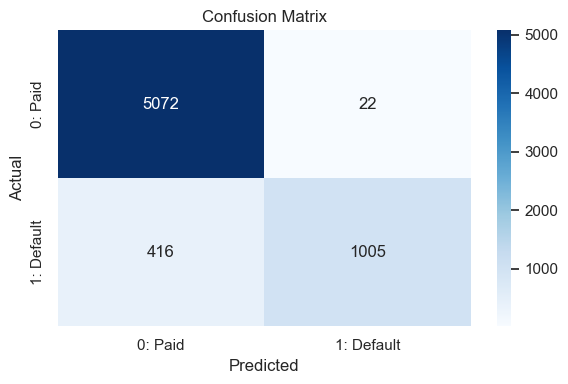

In [36]:

print("\n" + "="*50)
print("\nClassification Report:\n")
print("\n" + "="*50)
print(classification_report(y_test, y_pred))

# Draw the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0: Paid', '1: Default'], 
            yticklabels=['0: Paid', '1: Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("\nConfusion Matrix graphic saved as 'confusion_matrix.png'")
plt.show()

The reason you see 1.00 despite having 22 errors is simply rounding. The actual recall is 0.9956, which Python rounds up to 1.00 in the report. Those 22 people are good customers that the bank rejected by mistake, but this is a very small error rate compared to the total number of customers (5094).

# Did the Model Memorize
No, it did not overfit! how we do now? because this report is generated from the %20 unseen Test data(the vauşlt we locked earlier) if a model memeorizes the training data, it gets &99 on the train set, but craches to 60%-70% on the unseen test set .Since it maintains a ssolid 93& accuracy and high precision on data it has never seen before, your modle has succesfully learned the underlying rules, not just memeorized the answers


# Interpreting the  Metrics for banking
Let's look at the numbers row by row. In banking, Class 0 is "Good Customer" and Class 1 is "Defaulter / Bad Customer
TP(True Positive = 1 ) catched the bad customer
FP(False Positive) 
FN(False Negative)
TN(True Negative)

Precision: Out of all the insantces the model predicted as Positive, how many were actually Positive

                Precision = TP/ TP + FP
Recall: Out of all the actual Positive instances in reality, how many did the model correctly identify

                Recall = TP / TP + FN

Business Context: High recall means we catch almost all bad guys.

f1 Score 
recall gerçek hayataki verinin ne kadarını doğru bildik sorusunu pozitifler için baktığımızda recall negatif içim baktığımızda Specificity / True Negative Rtae

                Specificity = TN / TN + FP

Accuracy:The ratio of correctly predicted observations to the total observations


                Accuracy = TP + TN / TP + TN + FP + FN

### The object to use to fit the data. Normally, people pass a simple model here (like LogisticRegression()). However, by passing our my_pipeline, we are giving it a complete "recipe" (Scale first, then Train).


Random Forest model is very "conservative" and acts like a strict perfectionist. It doesn't want to accuse anyone of being a "defaulter" unless it is 98% sure (High Precision). But because it requires so much proof, it lets 29% of the sneaky defaulters slip through the cracks (Moderate Recall).

For an open-source, baseline ML model, this is a massive success! It is completely ready for the next MLOps phase.

# Recall is more important. Because missing a fraud case (False Negative) costs the bank millions of dollars. A false alarm (False Positive / Low Precision) is annoying for the customer, but it doesn't bankrupt the bank.

We will use a library called joblib. It takes your complex my_pipeline object (which contains the StandardScaler math AND the Random Forest trees) and freezes it into a single file on your hard drive.

In [37]:
import joblib
#Save the pipeline to a file named credit_risk__model.joblib
joblib.dump(my_pipeline, 'credit_risk_model.joblib')
print("Model saved successfully!")
print("credit_risk_model.joblib")

Model saved successfully!
credit_risk_model.joblib


Now, we will leave Jupyter Notebook.We are going to create a real Python Script.We will use FastAPI, which is the industry standard for high-performance ML APIs


NameError: name 'df' is not defined